<a href="https://colab.research.google.com/github/fujitsuacet06-oss/BB84-QKD-Simulator/blob/main/BB84_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pennylane
import numpy as np
n = int(input("Enter number of bits: "))
Sender_bits = [int(x) for x in np.random.randint(2, size=n)]
Sender_bases = [str(x) for x in np.random.choice(['R', 'D'], size=n)]
Receiver_bases = [str(x) for x in np.random.choice(['R', 'D'], size=n)]
Receiver_bits = []
for i in range(n):
    if Sender_bases[i] == Receiver_bases[i]:
        Receiver_bits.append(int(Sender_bits[i]))
    else:
        Receiver_bits.append(np.random.randint(2))
match_count = 0
Secret_key = []
for i in range(n):
    if Sender_bases[i] == Receiver_bases[i]:
       Secret_key.append(int(Receiver_bits[i]))
       match_count += 1
print("Sender bits :", Sender_bits)
print("Sender bases:", Sender_bases)
print("Receiver bases  :", Receiver_bases)
print("Receiver bits   :", Receiver_bits)
print("Matching bases count:", match_count)
print("Secret key:", Secret_key)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.6/935.6 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 103.3 MB/s eta 0:00:00
Enter number of bits: 20
Sender bits : [0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1]
Sender bases: ['D', 'R', 'D', 'D', 'R', 'R', 'D', 'D', 'R', 'R', 'R', 'R', 'R', 'D', 'D', 'R', 'D', 'R', 'R', 'R']
Receiver bases  : ['D', 'D', 'R', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'R', 'R', 'R', 'D', 'D', 'R', 'D', 'D', 'D', 'D']
Receiver bits   : [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0]
Matching bases count: 11
Secret key:

In [3]:
import pennylane as qml
import matplotlib.pyplot as plt

In [4]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def quantum_circuit(x, weights):
    qml.AngleEmbedding(x, wires=range(2))
    qml.BasicEntanglerLayers(weights, wires=range(2))
    return qml.expval(qml.PauliZ(0))

In [5]:
X = np.array([[0.1, 0.2],
              [1.0, 1.1],
              [0.3, 0.4],
              [1.2, 1.3]])
Y = np.array([1, -1, 1, -1])

In [6]:
def cost(weights):
    loss = 0
    for x, y in zip(X, Y):
        pred = quantum_circuit(x, weights)
        loss += (pred - y) ** 2
    return loss / len(Y)

In [7]:
weights = qml.numpy.array(np.random.random((1, 2)), requires_grad=True)
opt = qml.GradientDescentOptimizer(stepsize=0.1)
losses = []
for i in range(20):
    weights = opt.step(cost, weights)
    l = cost(weights)
    losses.append(l)
    print(f"Epoch {i+1} | Loss: {l:.4f}")

/usr/local/lib/python3.12/dist-packages/pennylane/_grad/grad.py:337: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnums' keyword.
  warnings.warn(


Epoch 1 | Loss: 0.8199
Epoch 2 | Loss: 0.8199
Epoch 3 | Loss: 0.8199
Epoch 4 | Loss: 0.8199
Epoch 5 | Loss: 0.8199
Epoch 6 | Loss: 0.8199
Epoch 7 | Loss: 0.8199
Epoch 8 | Loss: 0.8199
Epoch 9 | Loss: 0.8199
Epoch 10 | Loss: 0.8199
Epoch 11 | Loss: 0.8199
Epoch 12 | Loss: 0.8199
Epoch 13 | Loss: 0.8199
Epoch 14 | Loss: 0.8199
Epoch 15 | Loss: 0.8199
Epoch 16 | Loss: 0.8199
Epoch 17 | Loss: 0.8199
Epoch 18 | Loss: 0.8199
Epoch 19 | Loss: 0.8199
Epoch 20 | Loss: 0.8199


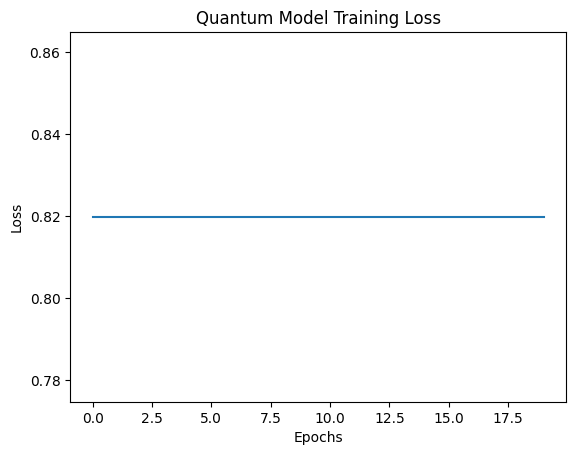

In [8]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Quantum Model Training Loss")
plt.show()

In [9]:
correct = 0
for x, y in zip(X, Y):
    if np.sign(quantum_circuit(x, weights)) == y:
        correct += 1
quantum_acc = correct / len(Y)
print("Quantum Accuracy:", quantum_acc)

Quantum Accuracy: 0.5


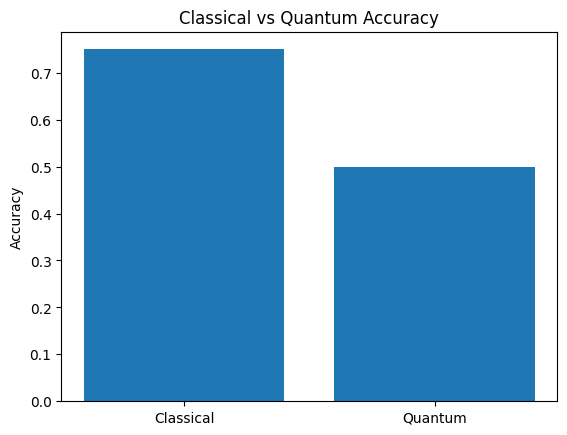

In [10]:
classical_acc = 0.75
models = ["Classical", "Quantum"]
accuracy = [classical_acc, quantum_acc]
plt.bar(models, accuracy)
plt.ylabel("Accuracy")
plt.title("Classical vs Quantum Accuracy")
plt.show()
